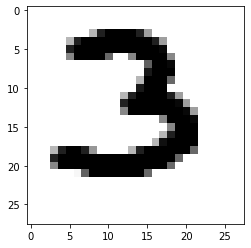

In [12]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import os

#getting image
dirpath = os.getcwd()
imagePath1 = dirpath+'\\testData\\3.png' 

im = imageio.imread(imagePath1)
plt.imshow(im)

In [2]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
#plt.imshow(gray, cmap = plt.get_cmap('gray'))

In [3]:
# reshape the image
gray = gray.reshape(1, 28, 28, 1)

# normalize image
gray = gray/ 255

In [4]:
# load the model
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
prediction

Using TensorFlow backend.


array([[1.20495715e-04, 3.08502990e-07, 9.99832034e-01, 3.03189199e-06,
        4.88623009e-09, 3.34026451e-09, 1.03628901e-08, 5.63069034e-06,
        3.73006114e-05, 1.22569156e-06]], dtype=float32)

Our test image is:


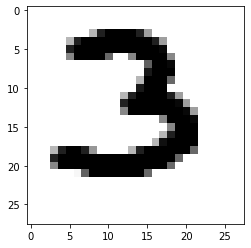

In [15]:
plt.imshow(im)
print("Our test image is:")

In [16]:

print("predicted the image as: ",prediction.argmax())

predicted the image as:  2


In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(x_train[0].shape)

(28, 28)


In [5]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import os

#getting image
dirpath = os.getcwd()
imagePath1 = dirpath+'\\testData\\2.png' 

im = imageio.imread(imagePath1)

gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
gray = gray.reshape(1, 28, 28, 1)
gray = 255-gray
gray = gray/255
#print(gray)
# plt.imshow(gray)


In [6]:
# load the model
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
prediction.argmax()

2

In [1]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import os

# load the model
from keras.models import load_model
model = load_model("test_model.h5")


Using TensorFlow backend.


In [22]:
import cv2

img = cv2.imread('saved.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#print("Number of contours = " + str(len(contours)))
#print(contours[0])

#cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
#cv2.drawContours(imgray, contours, -1, (0, 255, 0), 2)

#deleting the images already in the directory
dirpath = os.getcwd()
imageLocation = dirpath+'\\testData\\Segmented_Images\\'
for file in os.listdir(imageLocation):
        os.remove(imageLocation+file) 
        
i = 1
for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
       
        p = 10  #padding
        x,y,w,h = x-p,y-p,w+p+10,h+p+10
        roi = img[y:y+h, x:x+w]

        if cv2.contourArea(contour) < 800:
            continue 
        
        #saving the image
        name = imageLocation + 'roi'+str(i)+'.png'
        cv2.imwrite(name, roi)
        im = imageio.imread(name)
        print(name)
        i +=1
        #cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


predicted as 8


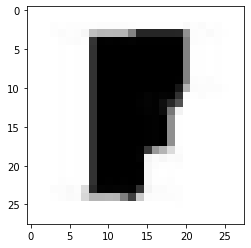

In [17]:

#getting image
im = imageio.imread(imageLocation+'roi3.png')
dim = (28,28)

#preprocessing image
im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
plt.imshow(im)
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
gray = gray.reshape(1, 28, 28, 1)
gray = 255-gray
gray = gray/255

# predict digit
prediction = model.predict(gray)
print("predicted as",prediction.argmax())